# Fictional Pet Sales EDA and Recommendation


In [2]:
import numpy as np 
import pandas as pd
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
        
print('Setup complete')

Setup complete


## Data Validation

The original data is **879 rows and 9 columns**. The first thing I did was to check the table for any null values, no null values were present. I then checked for the column **pet_type** for pet types that do not belong to cat, dog, fish, and bird. This was 46 rows, filtering these rows away leaves me with 833 rows of data. 

Next I checked for duplicates in columns **product_id and vendor_id**, there were none. I converted the datatype of column product_id from numeric into character. For **sales** column, I removed ',' and '$' characters and converted the datatype into numeric data. Looking at the remaining columns:

- There were 11 unique **product categories** or character dtype, as expected
- **Price** column is of numeric dtype, as expected
- There were 5 unique **pet sizes** of character dtype, as expected
- **Rating** values range from 1 to 10 as numeric dtype, all are within the range expected
- There are only two values for **Rebuy** 1 or 0, as expected, I converted this into binary dtype

Additionally, I created a new column (pet_product_category) which is a concatenation of the pet_type and product_category columns, this is to help with visualization later on.


In [3]:
main_df = pd.read_csv('pet_sales.csv')
main_df

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,"$27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"$76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"$162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"$34,000",199.15,VC_1229,large,dog,10,1


In [4]:
print('Shape', main_df.shape)
print('Null values')
print(main_df.isnull().sum())

Shape (879, 9)
Null values
product_id          0
product_category    0
sales               0
price               0
vendor_id           0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64


In [5]:
print('Original Shape', main_df.shape)

invalid_pet_types = ['hamster', 'rabbit']
print('Number of invalid pet types containing others =', main_df['pet_type'].isin(invalid_pet_types).sum())

valid_pet_types = ['bird', 'cat', 'dog', 'fish']
filtered_df = main_df[main_df['pet_type'].isin(valid_pet_types)] #filter to only include the four categories
print('Filtered Shape',filtered_df.shape)

Original Shape (879, 9)
Number of invalid pet types containing others = 46
Filtered Shape (833, 9)


In [6]:
cat_ord_headers = filtered_df[['product_category','pet_size','pet_type','rating','re_buy']]

for n in cat_ord_headers:
    print('Unique values of', n)
    print(pd.unique(filtered_df[n].sort_values()))
    print()

Unique values of product_category
['Accessory' 'Bedding' 'Clothes' 'Equipment' 'Food' 'Grooming' 'Housing'
 'Medicine' 'Snack' 'Supplements' 'Toys']

Unique values of pet_size
['extra_large' 'extra_small' 'large' 'medium' 'small']

Unique values of pet_type
['bird' 'cat' 'dog' 'fish']

Unique values of rating
[ 1  2  3  4  5  6  7  8  9 10]

Unique values of re_buy
[0 1]



In [7]:
filtered_df['product_id'] = filtered_df['product_id'].astype(str) #convert to str
filtered_df['sales'] = filtered_df['sales'].str.replace('$', '') #remove '$' and ',' then convert to integer
filtered_df['sales'] = filtered_df['sales'].str.replace(',', '')
filtered_df['sales'] = filtered_df['sales'].astype('int64')

df_binary = pd.get_dummies(filtered_df["re_buy"]) #changing into binary datatype
df_binary.columns = ['0', 're_buy']
df_binary = df_binary.drop('0', axis = 1)
filtered_df = filtered_df.drop('re_buy', axis = 1)
filtered_df = pd.concat((filtered_df, df_binary), axis=1)
filtered_df.dtypes


product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                uint8
dtype: object

In [8]:
filtered_df['pet_product_category'] = filtered_df['pet_type'] + " " + filtered_df['product_category'].str.lower()

filtered_df

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy,pet_product_category
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1,fish equipment
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0,cat toys
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1,dog snack
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0,dog supplements
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0,cat bedding
...,...,...,...,...,...,...,...,...,...,...
873,4343,Equipment,212000,129.84,VC_908,medium,cat,10,1,cat equipment
874,4999,Snack,27000,146.93,VC_1564,medium,bird,6,0,bird snack
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1,cat snack
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1,dog bedding


## Data Discovery and Visualization

## Company Background
PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year
highs, the company is planning to reduce the cost of customer retention by improving brand
loyalty. The first strategy is to launch a monthly pet box subscription in three months.

The marketing team is preparing a list of popular products for the pet box subscription. The
chief marketing officer wants to know whether the list should only include the products being
purchased more than once.

## Customer Questions:
1. How many products are being purchased more than once?
2. Do the products being purchased again have better sales than others?
3. What products are more likely to be purchased again for different types of pets?


## Question 1. How many products are being purchased more than once?
- We observe from the graph below that **390 types of products are purchased more than once.**

- While this is lower than one-time purchases of 443 types, **repurchased items still make up near to half (46.82%) of the types of products sold.**

- Note that the **majority of products purchased are for cats and dogs.**

In [9]:
final_df = filtered_df.copy()
final_df['re_buy'] = final_df['re_buy'].apply(lambda x: 'Yes' if x == 1 else 'No')
#change to categorical(str) for plotting

In [10]:
repurchase_df = final_df[['re_buy','pet_type']]

repurchase_df_gb = repurchase_df.groupby('re_buy', as_index = False).count()
repurchase_df_gb['percent'] = round(repurchase_df_gb['pet_type']/repurchase_df_gb['pet_type'].sum()*100, 2)
repurchase_df_gb.columns = [['Repurchased','Number of products', 'Percentage (%)']]

display(repurchase_df_gb)

g = px.histogram(repurchase_df, x='re_buy', color='pet_type', width=600, height=500, text_auto=True, title = 'Number of products sold')

g.show()

,Repurchased,Number of products,Percentage (%)
0,No,443,53.18
1,Yes,390,46.82


## Question 2. Do the products being purchased again have better sales than others?

- **Total sales for products being purchased again is lower (47.14% of sales)** than one-time purchases (52.86% of sales). 
- This trend is consistent across all pet types. 

While one-time purchases make up more sales overall. But a monthly pet subscription box can be a way to increase sales for products being purchased again.

In [11]:
repurchase_sales_df = final_df[['re_buy','sales', 'pet_type']]

repurchase_sales_df_gb = repurchase_sales_df.groupby(['pet_type', 're_buy'], as_index = False).sum().sort_values(['sales'], ascending=False)

display_df = repurchase_sales_df.groupby('re_buy', as_index = False).sum()
display_df['percent'] = round(display_df['sales']/display_df['sales'].sum()*100, 2)
display_df.columns = [['Repurchased', 'Sales ($)', 'Percentage (%)']]
display(display_df)

g = px.histogram(repurchase_sales_df_gb, y='pet_type', x='sales', color='re_buy', barmode='group', width=600, height=400, orientation='h' ,title = 'Sales of products ($ million) purchased more than once')
g.update_layout(legend_traceorder="reversed")
g.show()

,Repurchased,Sales ($),Percentage (%)
0,No,51125000,52.86
1,Yes,45587000,47.14


The table below shows that **cats and dogs make up the majority of sales (total 82.65% based on second table)**. 

As a start, the pet subscription box can focus on these two pet types.

In [12]:
display2_df = repurchase_sales_df.groupby(['pet_type'], as_index = False).sum().sort_values(['sales'])
display2_df['percent'] = round(display2_df['sales']/display2_df['sales'].sum()*100, 2)
display2_df.columns = [['Pet type', 'Sales','Percentage (%)']]
display(display2_df)

,Pet type,Sales,Percentage (%)
0,bird,8246000,8.53
3,fish,8538000,8.83
2,dog,39699000,41.05
1,cat,40229000,41.60


## Question 3. What products are more likely to be purchased again for different types of pets?

## For products purchased again:

1. From the pie chart below, we see that the **top sales of product categories (>8%) across all pet types are**
- Equipment
- Snack
- Toys
- Medicine
- Food

In [13]:
pet_product_category_df = final_df[(final_df['re_buy'] == 'Yes')][['pet_type','product_category','sales']] #select only repurchased products
pet_product_category_df_gb = pet_product_category_df.groupby(['pet_type','product_category'], as_index=False).sum().sort_values('sales')
g = px.pie(pet_product_category_df_gb, values='sales', names='product_category', title='Breakdown of sales (% total) of different product categories ----- for products purchased again')
g.show()

2. Note that these **product categories are mostly similar across pet types**, with majority of sales coming from dog and cat categories.<p></p>

In [14]:
g = px.bar(pet_product_category_df_gb, y='pet_type', x="sales", color='product_category', orientation ='h', height= 500, hover_data={'sales':True , 'pet_type':False, 'product_category':False}, hover_name='product_category', title='Breakdown of sales ($ million) of different pet type and product categories <br>----- for products purchased again')
g.show()

## For products NOT purchased again:

**1. From the pie chart below, we see that the top sales of product categories (>8%) across all pet types are similar**
- Equipment
- Snack
- Toys
- Medicine
- Supplements (only this category is different from the previous, which was 'food')

In [15]:
single_df = final_df[(final_df['re_buy'] == 'No')][['pet_type','product_category','sales']] #select products purchased  once
single_df = single_df.groupby(['pet_type','product_category'], as_index=False).sum().sort_values('sales')
g = px.pie(single_df, values='sales', names='product_category', title='Breakdown of sales (% total) of different product categories ----- for products NOT purchased again')
g.show()

## Main Question: Should the list only include the products being purchased more than once?

**NO**
- Product categories for products being purchased more than once and those purchased only once are very similar, we need to explore other confounding factors that are influencing these purchases
- We need to also consider quality and customer satisfaction from the products (rating)
- And the price of the products

Note from scatter plot below (average rating against total sales):

1. Products with the **most sales are a combination of both** products purchased once, and more than once.
2. There are also **one time products with high sales and high ratings** show that these products are well-received by the customers. 
3. There is no clear trend from scatterplot between products re_buy.
4. **Ratings play an important role in sales. Majority of categories with average ratings above 5 are above the median sales - 1 million sales (refer to box plot below)**

In [16]:
ratings_df = final_df[['re_buy', 'sales', 'pet_product_category', 'rating','price']]

ratings_df = ratings_df.groupby(['re_buy', 'pet_product_category'], as_index = False)
ratings_df = ratings_df.agg({
    'sales': 'sum',
    'rating': 'mean',
	'price': 'mean'}).sort_values(['sales'], ascending=False)
ratings_df.columns = ['re_buy', 'pet_product_category', 'total sales', 'average rating', 'average price']

g = px.scatter(ratings_df, x='total sales', y='average rating', color='re_buy', hover_name='pet_product_category', title='Average rating against total sales by category')
g.show()

In [17]:
sales_box_df = final_df[['re_buy','pet_product_category', 'sales']]

sales_box_df = sales_box_df.groupby(['re_buy','pet_product_category'], as_index = False).sum()

g = px.box(sales_box_df, x='sales', color = 're_buy', title='Box plot by pet_product_category')
g.show()

From the second scatter plot below (on average price)

1. There is **no clear trend from scatterplot** between products re_buy.
2. Best selling items have an average price of between $100-150. When thinking of pricing strategy.

In [18]:
g = px.scatter(ratings_df, x='total sales', y='average price', color='re_buy', hover_name='pet_product_category', title='Average price against total sales for all categories')
g.show()

## Conclusion for pet box
1. We should focus on BOTH products purchased again, and those purchased once.
- sales of products purchased once are still higher.
- products purchased once may have high ratings, indicating customer satisfaction.

2. Equipment, snacks and toys are top categories for both.

3. Focus on dog and cat products that make up > 80% of all sales.

4. Pricing strategy - note that best selling items have an average price of between $100-150. 

5. Make use of pareto diagram below to identify the top categories by cumulative sales.

## Pareto diagram for all products:

1. We can see from the pareto chart below that the **top 9 categories account for 50% cumulative sales of products purchased again.**<p></p>

2. The top 20 categories account for 80% cumulative sales. <p></p>

3. **All top 20 categories come from dogs and cats.**

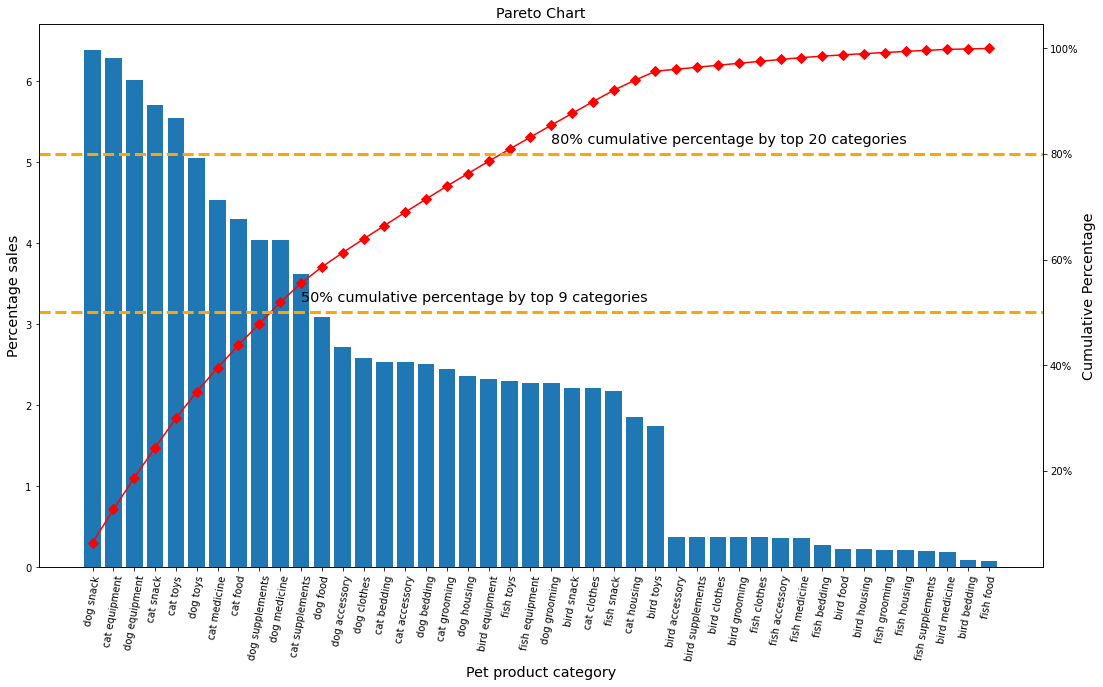

In [19]:
bar_df = final_df[['pet_product_category','sales']]
bar_df_gb = bar_df.groupby('pet_product_category', as_index=False).sum().sort_values('sales', ascending=False)
bar_df_gb['percent sales'] = round(bar_df_gb['sales']/bar_df_gb['sales'].sum()*100,2)
bar_df_gb["cum_percentage"] = round(bar_df_gb["sales"].cumsum()/bar_df_gb["sales"].sum()*100,2)

#g = px.histogram(bar_df_gb, y='pet_product_category', x="percent sales", orientation ='h', height= 800, hover_data={'sales':True , 'percent sales':True, 'pet_product_category':False}, hover_name='pet_product_category' ,title='Top sales (% of total sales) across all pet types and product categories ----- for products purchased again')
#g.show()

# Set figure and axis
fig, ax = plt.subplots(figsize=(18,10))

# Plot bars (i.e. frequencies)
ax.bar(bar_df_gb['pet_product_category'], bar_df_gb["percent sales"])
ax.set_title("Pareto Chart", fontsize = 'x-large')
ax.set_xlabel("Pet product category", fontsize = 'x-large')
ax.set_ylabel("Percentage sales", fontsize = 'x-large')
ax.set_xticklabels(bar_df_gb['pet_product_category'], rotation = 80)
;

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(bar_df_gb['pet_product_category'], bar_df_gb["cum_percentage"], color="red", marker="D", ms=7)

ax2.axhline(50, color="orange", linestyle="dashed", linewidth=3)
ax2.annotate('50% cumulative percentage by top 9 categories', (10,52), fontsize ='x-large')
ax2.axhline(80, color="orange", linestyle="dashed", linewidth=3)
ax2.annotate('80% cumulative percentage by top 20 categories', (22,82), fontsize ='x-large')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage", fontsize = 'x-large');